In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')

header = ['ID', 'Гендер', 'Возраст', 'Гипертония', 'Сердечная болезнь',
           'Был ли в браке', 'Тип работы', 'Тип местности проживания',
             'Средний уровень глюкозы', 'ИМТ', 'Статус курения', 'Инсульт']
data.columns= header
data

,ID,Гендер,Возраст,Гипертония,Сердечная болезнь,Был ли в браке,Тип работы,Тип местности проживания,Средний уровень глюкозы,ИМТ,Статус курения,Инсульт
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.drop(columns=['ID'], inplace=True)

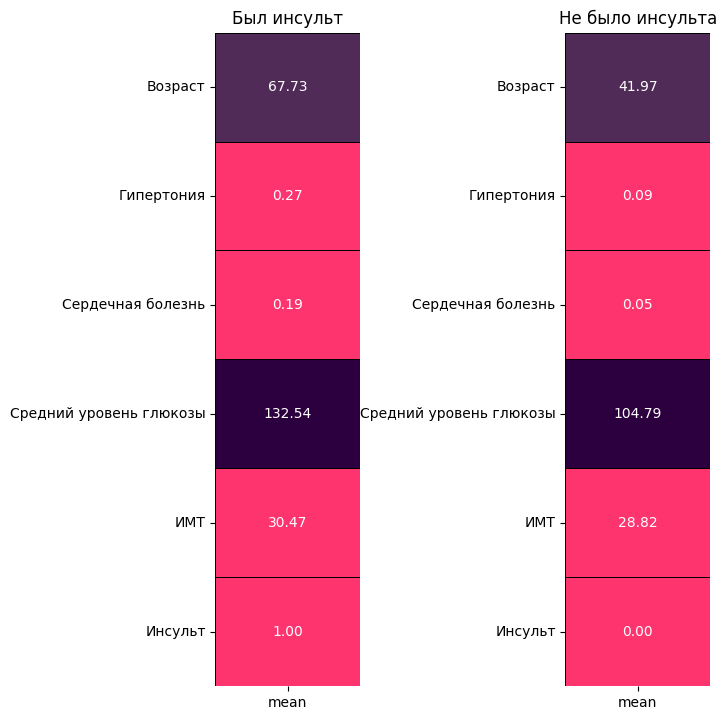

In [5]:
stroke = data[data['Инсульт'] == 1].describe().T
no_stroke = data[data['Инсульт'] == 0].describe().T

colors = ['#fe346e','#512b58','#2c003e']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,7))
plt.subplot(1,2,1)
sb.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Был инсульт')

plt.subplot(1,2,2)
sb.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Не было инсульта')

fig.tight_layout(pad = 0)

In [6]:
# Заполнить пропущенные значения: средними значениями
data['ИМТ'].replace(np.nan, data['ИМТ'].mean(), inplace=True)


In [7]:
print(set(data['Статус курения']))

{'smokes', 'Unknown', 'never smoked', 'formerly smoked'}


In [8]:
data.isnull().sum()

Гендер                      0
Возраст                     0
Гипертония                  0
Сердечная болезнь           0
Был ли в браке              0
Тип работы                  0
Тип местности проживания    0
Средний уровень глюкозы     0
ИМТ                         0
Статус курения              0
Инсульт                     0
dtype: int64

In [9]:
data.dtypes

Гендер                       object
Возраст                     float64
Гипертония                    int64
Сердечная болезнь             int64
Был ли в браке               object
Тип работы                   object
Тип местности проживания     object
Средний уровень глюкозы     float64
ИМТ                         float64
Статус курения               object
Инсульт                       int64
dtype: object

In [24]:
data.describe()

,Гендер,Возраст,Гипертония,Сердечная болезнь,Был ли в браке,Тип работы,Тип местности проживания,Средний уровень глюкозы,ИМТ,Статус курения,Инсульт
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,43.229986,0.097475,0.054022,0.656293,2.423762,0.491877,106.140399,28.894560,1.111568,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.267134,0.499983,45.285004,7.698235,1.071852,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.240000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,3.000000,0.000000,91.880000,28.400000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


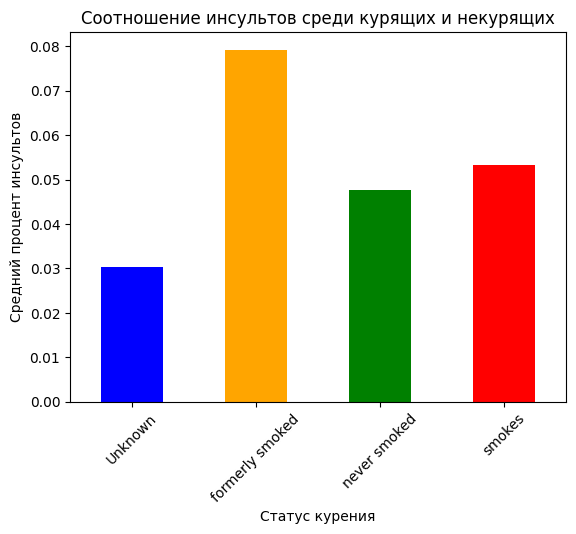

In [ ]:
smoking_stroke = data.groupby('Статус курения')['Инсульт'].mean()
smoking_stroke.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Соотношение инсультов среди курящих и некурящих')
plt.xlabel('Статус курения')
plt.ylabel('Средний процент инсультов')
plt.xticks(rotation=45)
plt.show()

In [25]:
data['Гендер'] = data['Гендер'].replace({'Male': 1, 'Female': 0})
data['Был ли в браке'] = data['Был ли в браке'].replace({'Yes': 1, 'No': 0})
data['Тип местности проживания'] = data['Тип местности проживания'].replace({'Rural': 1, 'Urban': 0})
data['Тип работы'] = data['Тип работы'].replace({'Self-employed': 1, 'Govt_job': 0, 'Never_worked':2, 'Private':3, 'children':4})
data['Статус курения'] = data['Статус курения'].replace({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3})

average = data.mean()
median_values = data.median()

print(average)
print(median_values)

Гендер                        0.413975
Возраст                      43.229986
Гипертония                    0.097475
Сердечная болезнь             0.054022
Был ли в браке                0.656293
Тип работы                    2.423762
Тип местности проживания      0.491877
Средний уровень глюкозы     106.140399
ИМТ                          28.894560
Статус курения                1.111568
Инсульт                       0.048738
dtype: float64
Гендер                       0.00
Возраст                     45.00
Гипертония                   0.00
Сердечная болезнь            0.00
Был ли в браке               1.00
Тип работы                   3.00
Тип местности проживания     0.00
Средний уровень глюкозы     91.88
ИМТ                         28.40
Статус курения               1.00
Инсульт                      0.00
dtype: float64


# Визуализация данных

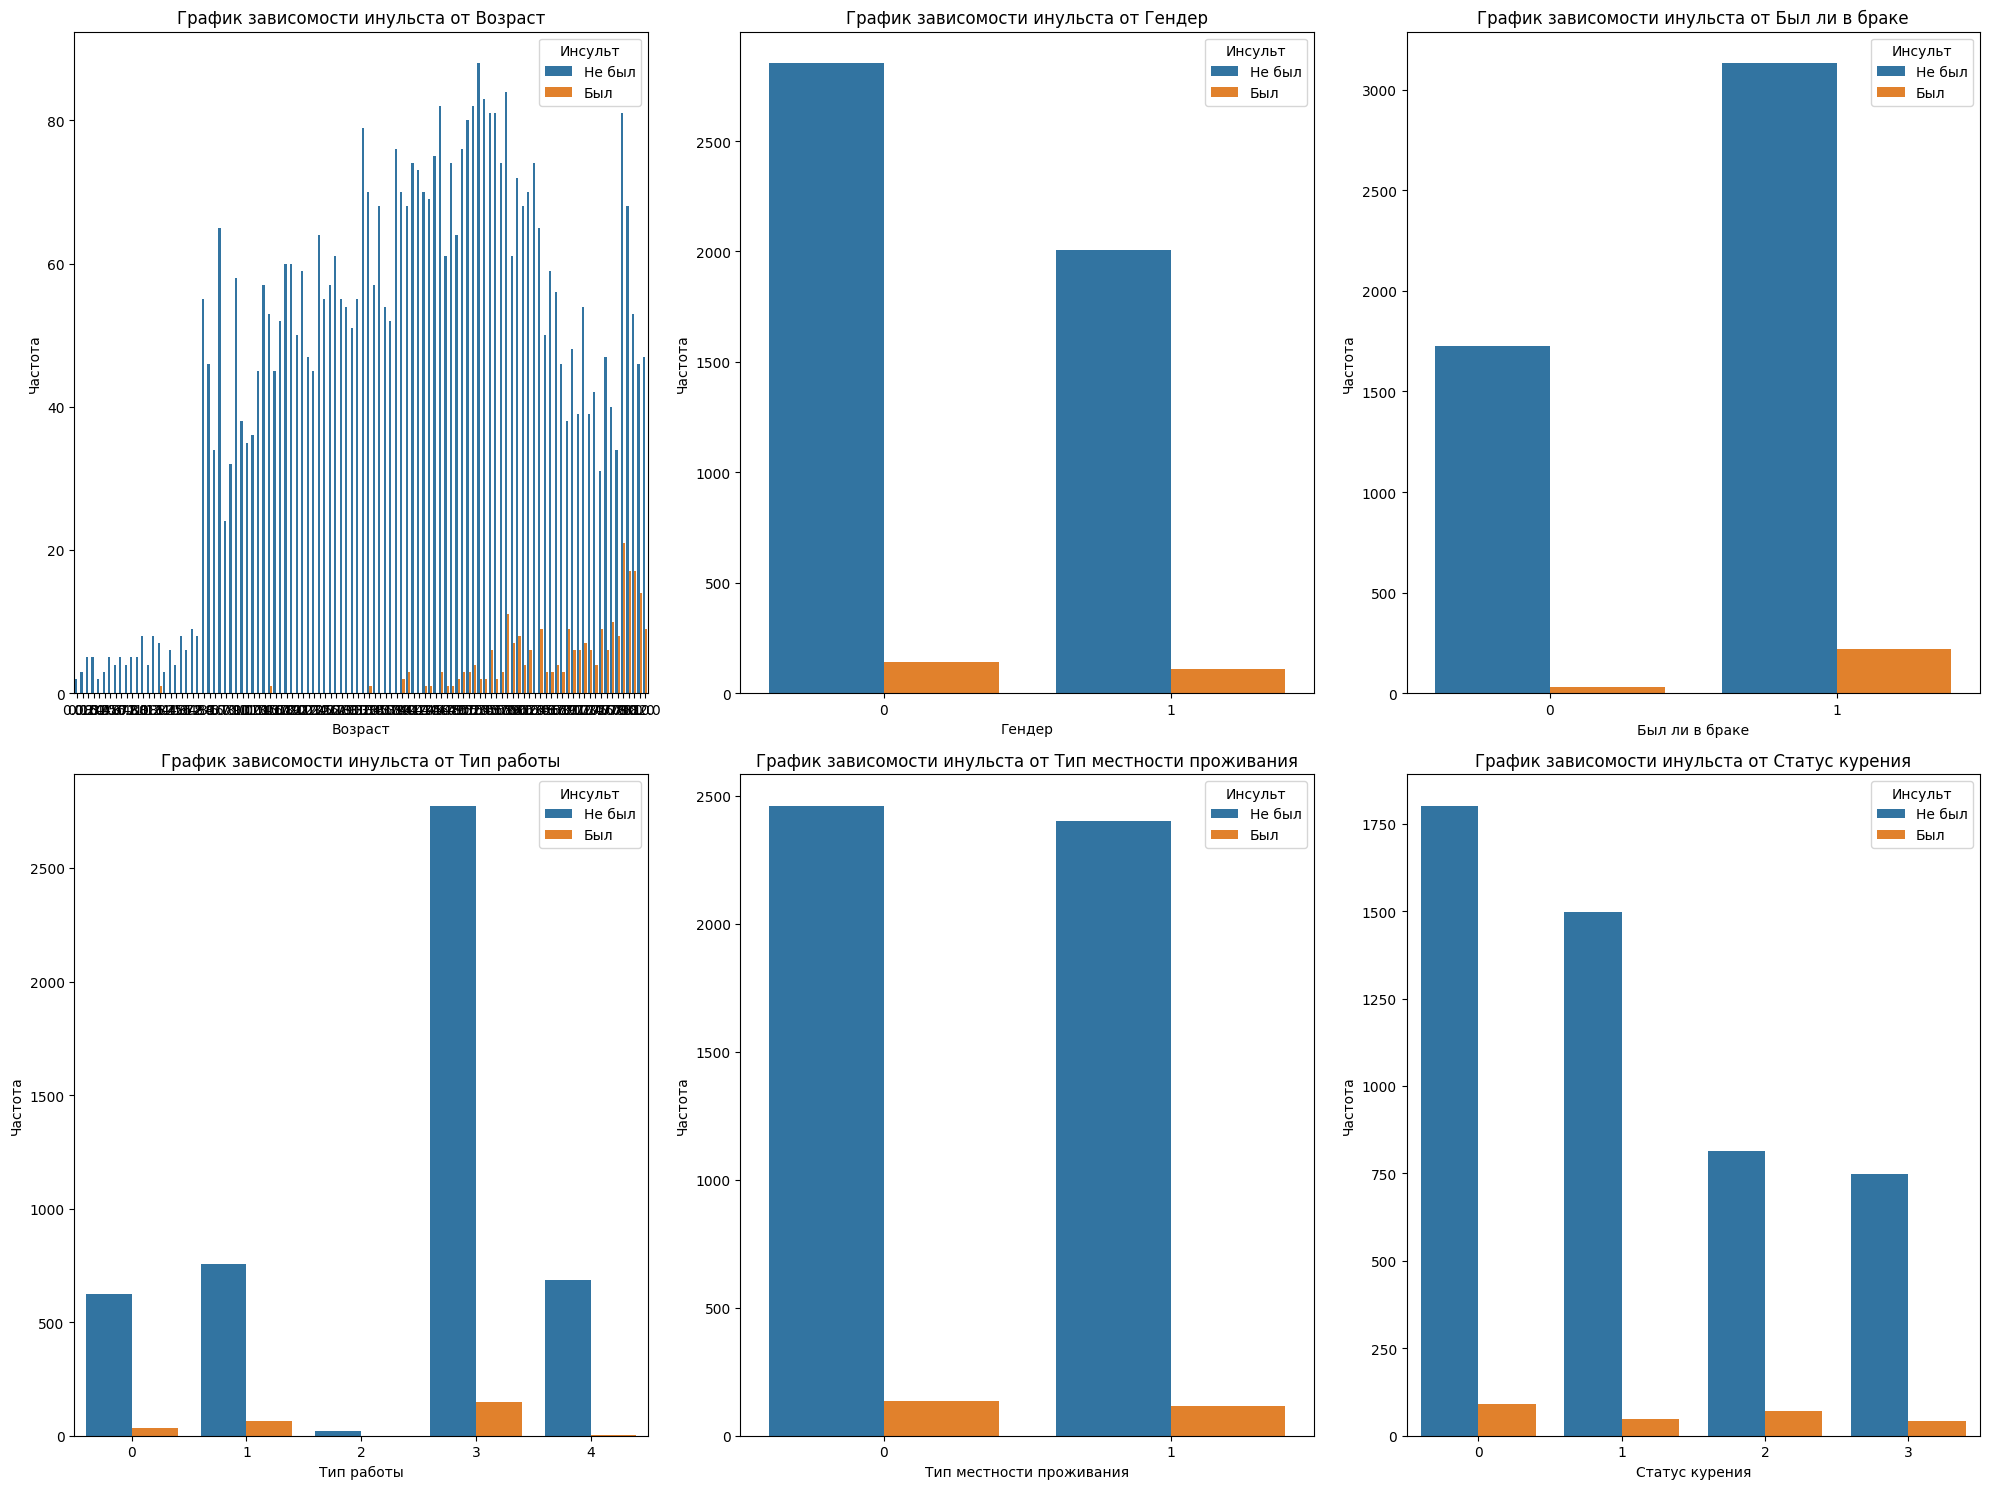

{'Возраст': Возраст
 78.00    102
 57.00     95
 52.00     90
 54.00     87
 51.00     86
         ... 
 1.40       3
 0.48       3
 0.16       3
 0.40       2
 0.08       2
 Name: count, Length: 104, dtype: int64,
 'Гендер': Гендер
 0    2994
 1    2115
 Name: count, dtype: int64,
 'Был ли в браке': Был ли в браке
 1    3353
 0    1756
 Name: count, dtype: int64,
 'Тип работы': Тип работы
 3    2924
 1     819
 4     687
 0     657
 2      22
 Name: count, dtype: int64,
 'Тип местности проживания': Тип местности проживания
 0    2596
 1    2513
 Name: count, dtype: int64,
 'Статус курения': Статус курения
 0    1892
 1    1544
 2     884
 3     789
 Name: count, dtype: int64}

In [65]:
categorical_cols = ['Возраст','Гендер', 'Был ли в браке', 'Тип работы', 'Тип местности проживания', 'Статус курения']

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sb.countplot(data=data, x=col, hue='Инсульт')
    plt.title(f'График зависомости инульста от {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend(title='Инсульт', labels=['Не был', 'Был'])

plt.tight_layout()
plt.show()

# Value counts for each categorical feature
value_counts = {col: data[col].value_counts() for col in categorical_cols}
value_counts

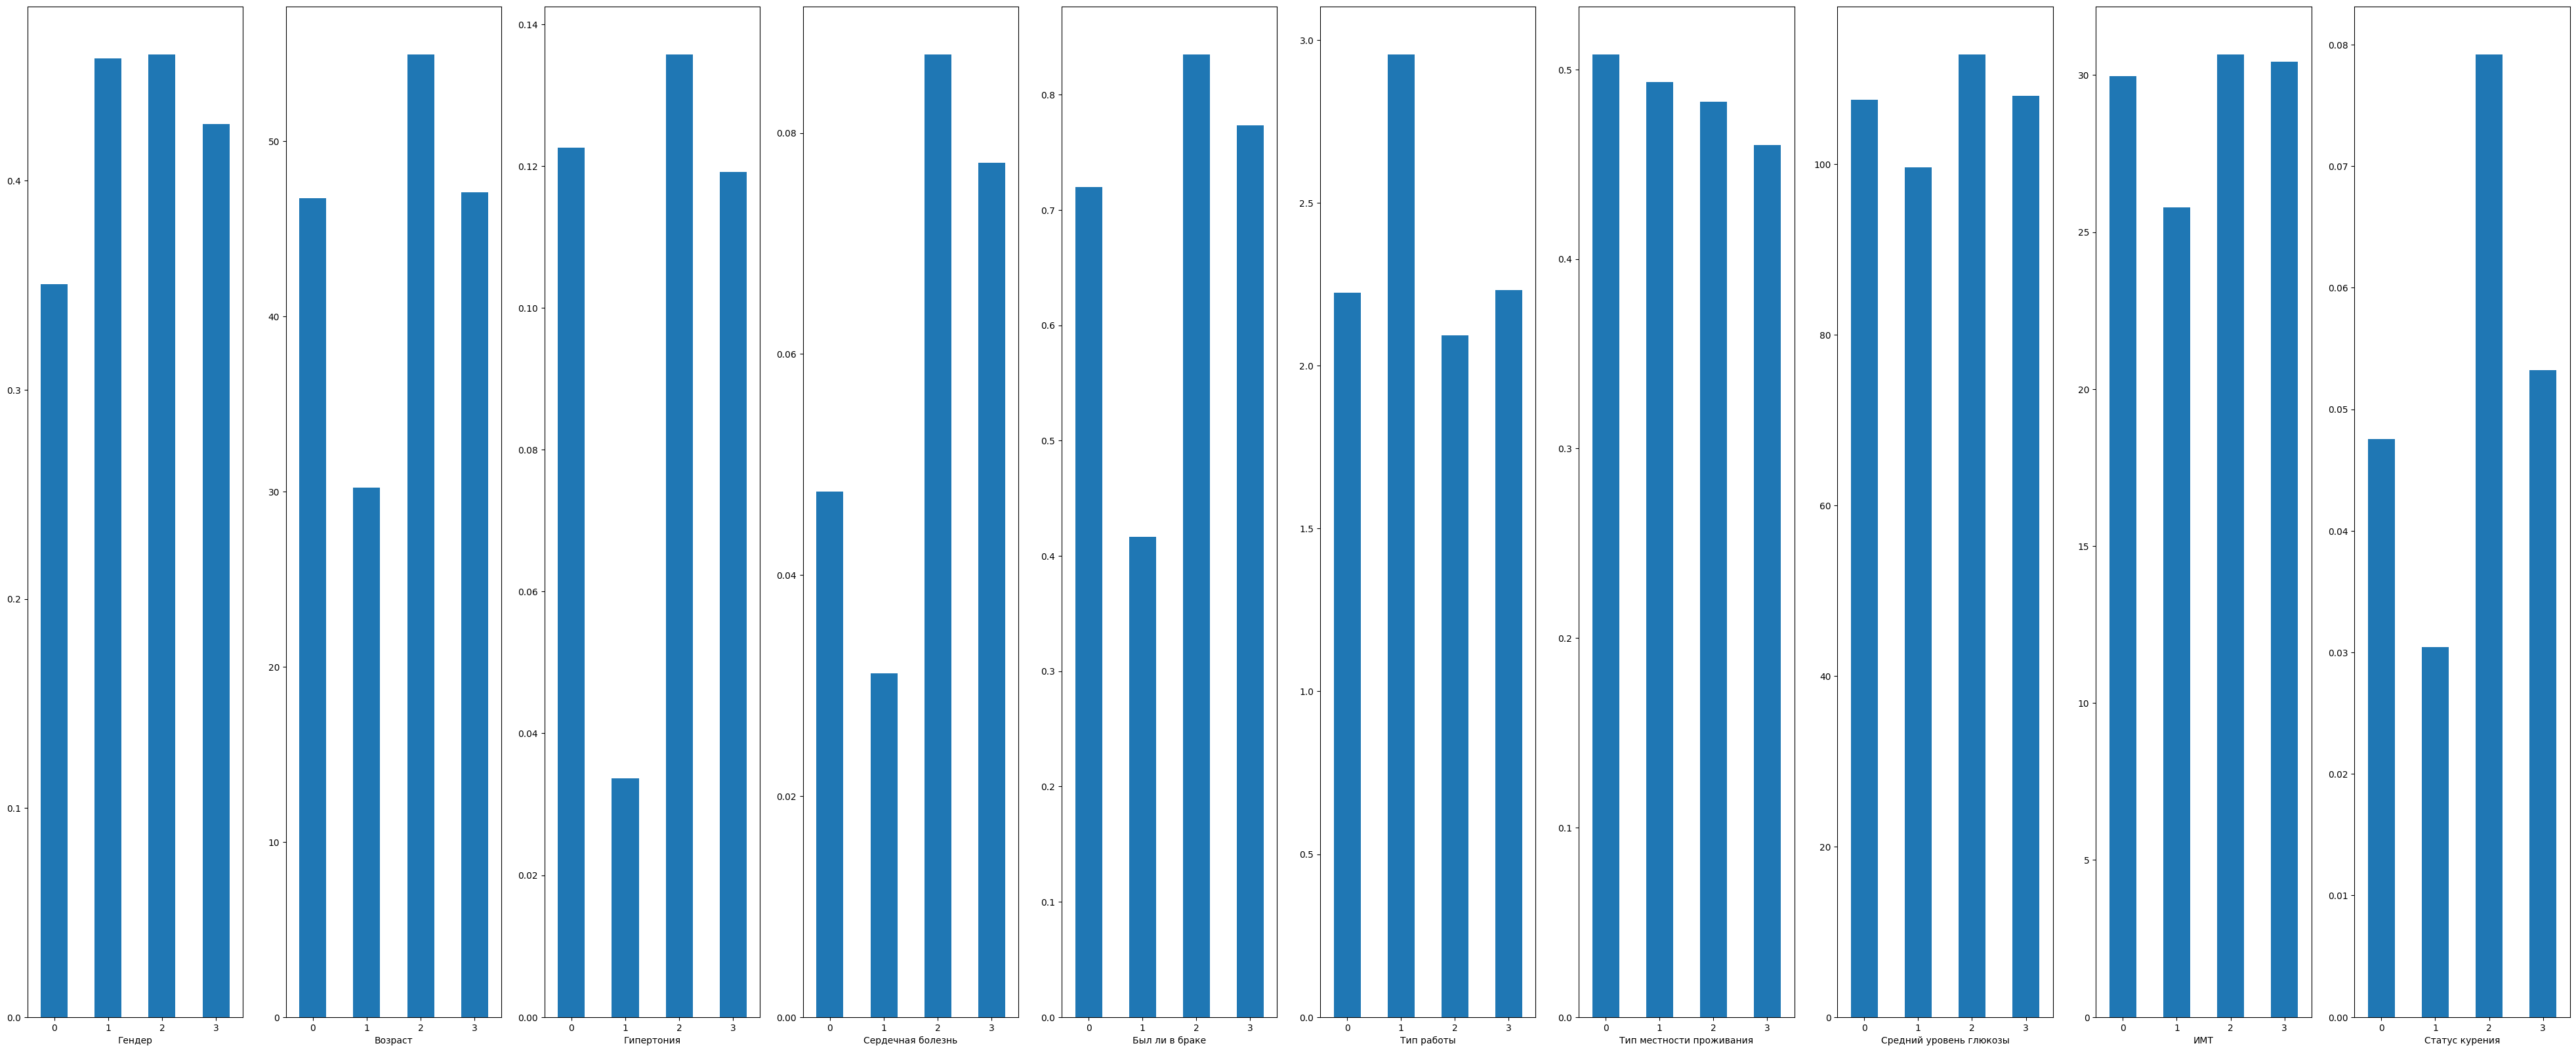

In [47]:
means = data.groupby('Статус курения').mean()

# Create a single figure with multiple subplots
num_columns = len(means.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(50, 20))




for i, column in enumerate(means.columns):
    means[column].plot(kind='bar', rot=0, ax=axes[i])
    axes[i].set_xlabel(data.columns[i])

# plt.tight_layout()
plt.show()

# Зависимости

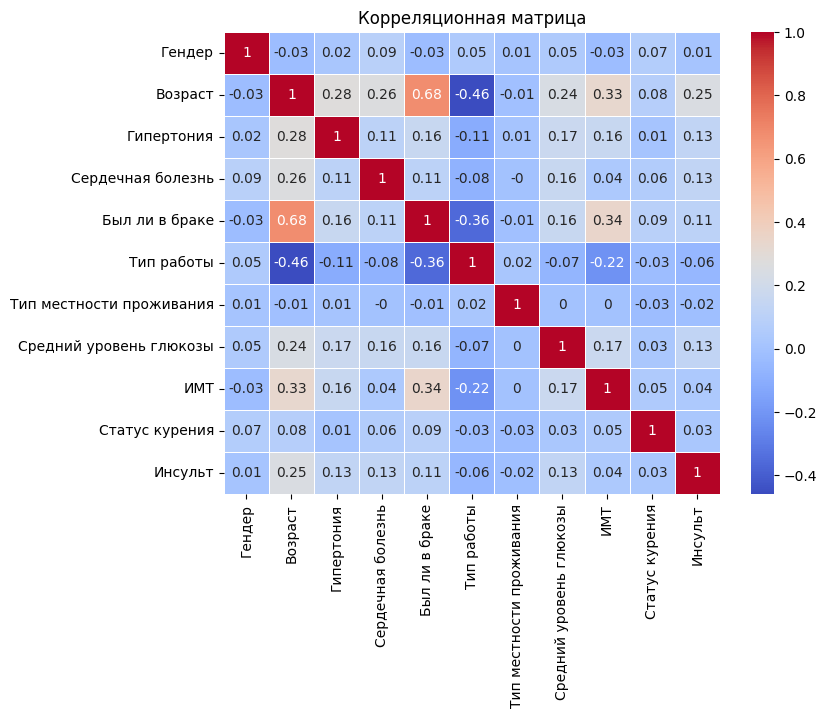

In [12]:


data = data.fillna(data.mean())
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(8, 6))  # Размер графика
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Добавьте название графика
plt.title('Корреляционная матрица')

# Отобразите график
plt.show()



#123

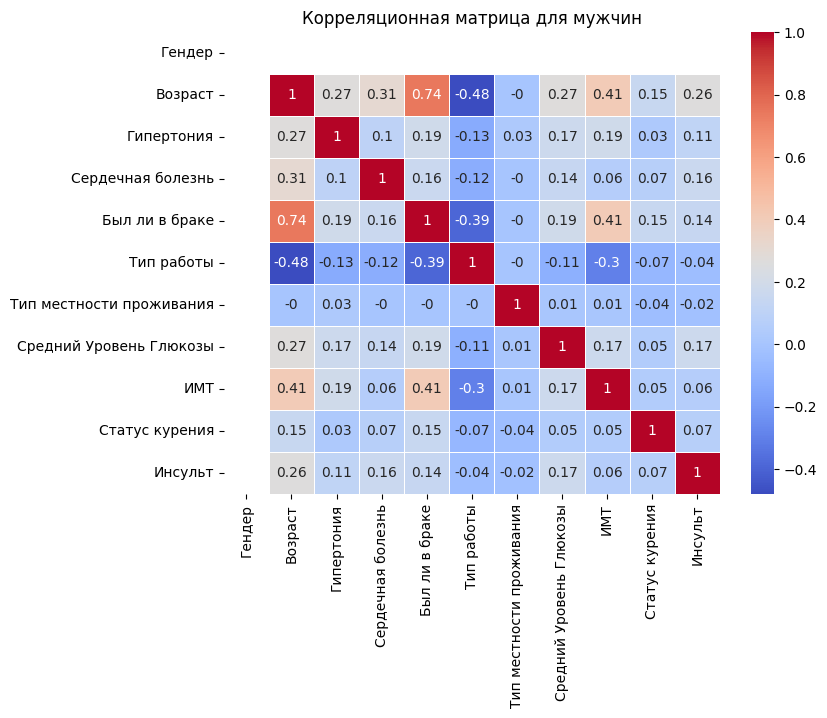

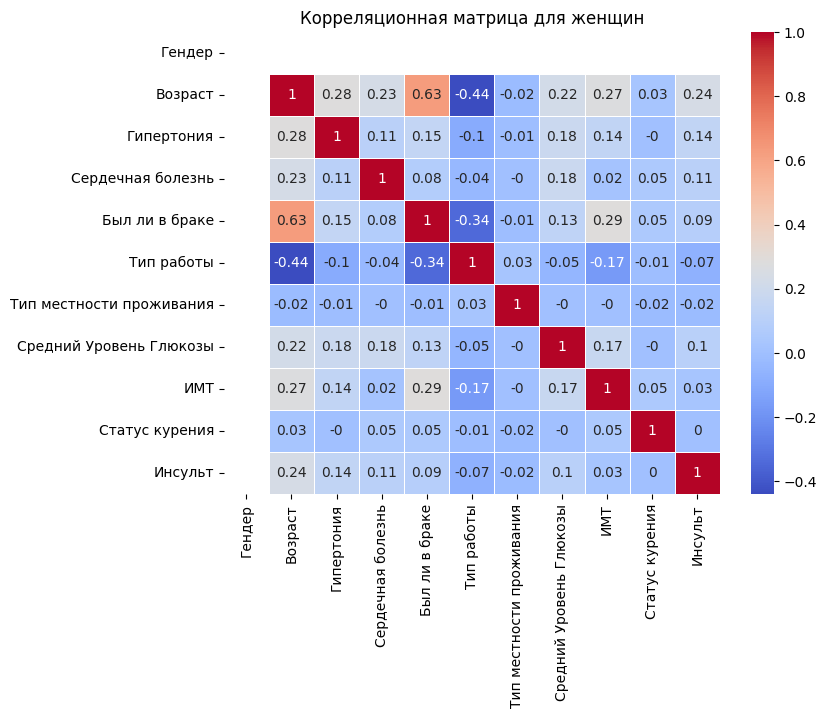

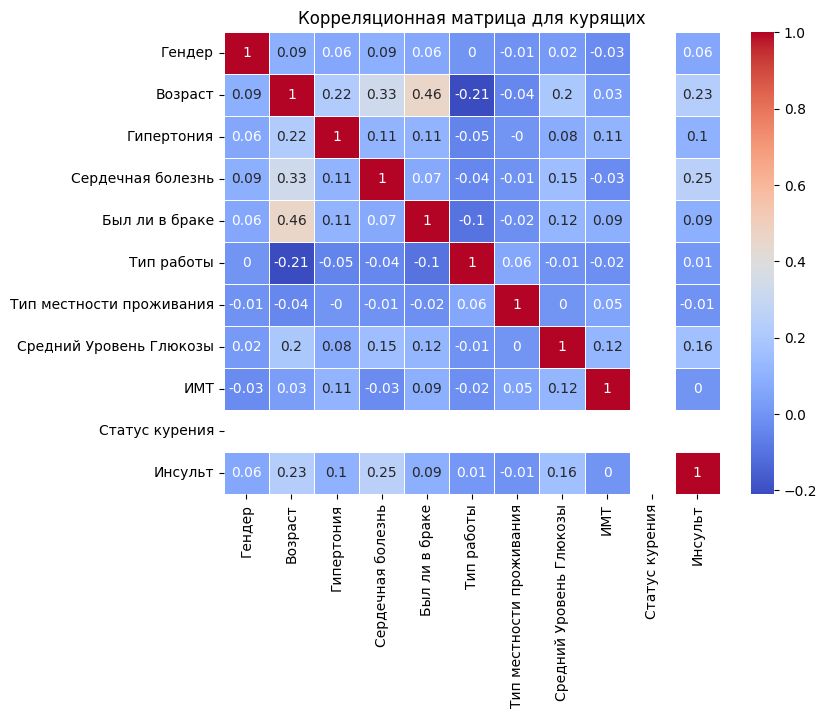

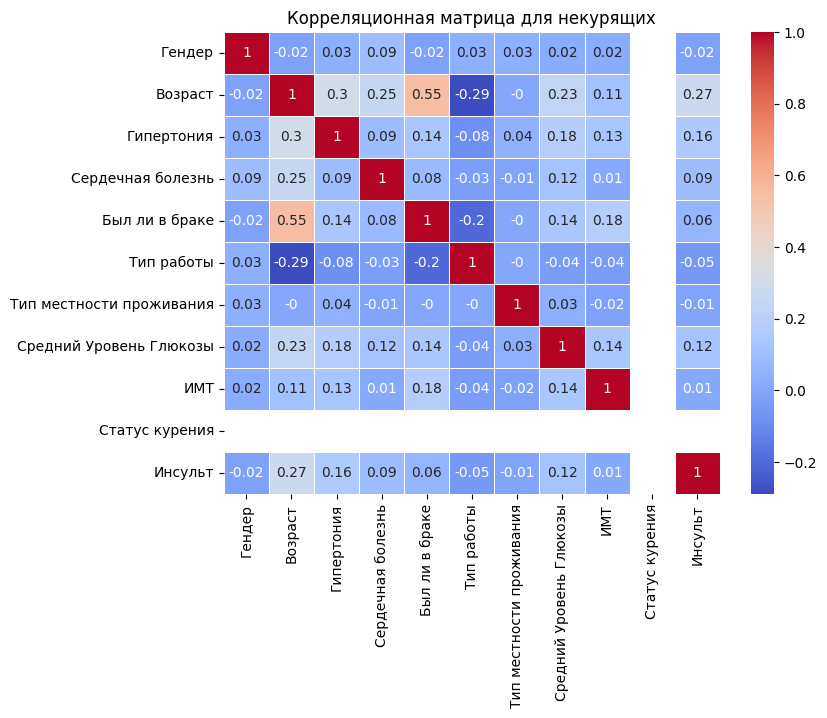

In [ ]:
male_data = data[data['Гендер'] == 1]  # Выберите только мужчин
female_data = data[data['Гендер'] == 0]  # Выберите только женщин
smoker_data = data[data['Статус курения'] == 3]  # Выберите только курящих
non_smoker_data = data[data['Статус курения'] == 0]  # Выберите только некурящих
# average_level_glukoza_data = data[data['Средний Уровень Глюкозы']]

male_correlation_matrix = male_data.corr().round(2)
female_correlation_matrix = female_data.corr().round(2)
smoker_correlation_matrix = smoker_data.corr().round(2)
non_smoker_correlation_matrix = non_smoker_data.corr().round(2)
# glukoza_coorelation_matrix = average_level_glukoza_data.corr().round(2)

plt.figure(figsize=(8, 6))
sb.heatmap(male_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для мужчин')
plt.show()

# Для женщин
plt.figure(figsize=(8, 6))
sb.heatmap(female_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для женщин')
plt.show()

# Для курящих
plt.figure(figsize=(8, 6))
sb.heatmap(smoker_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для курящих')
plt.show()

# Для некурящих
plt.figure(figsize=(8, 6))
sb.heatmap(non_smoker_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для некурящих')
plt.show()


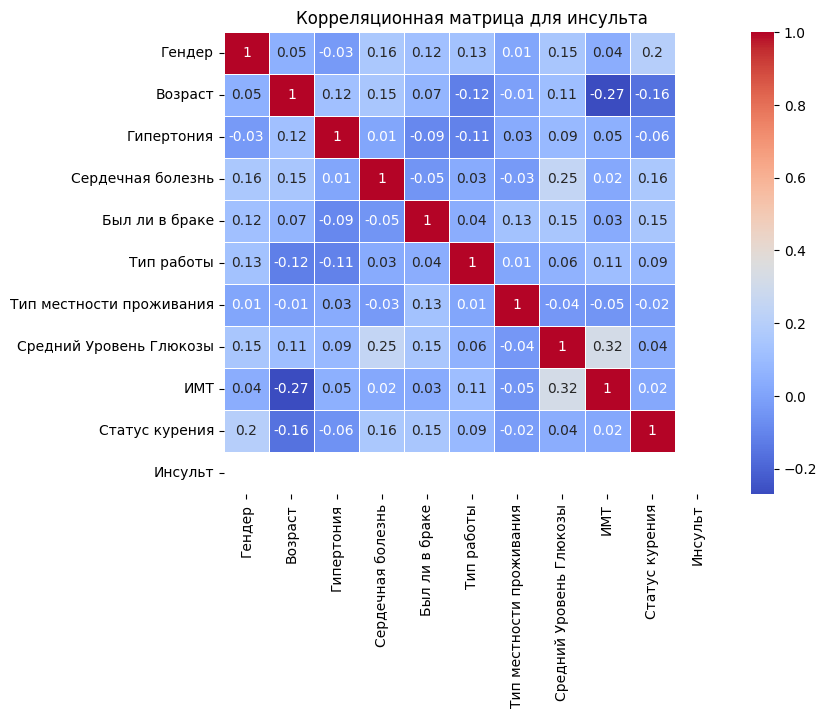

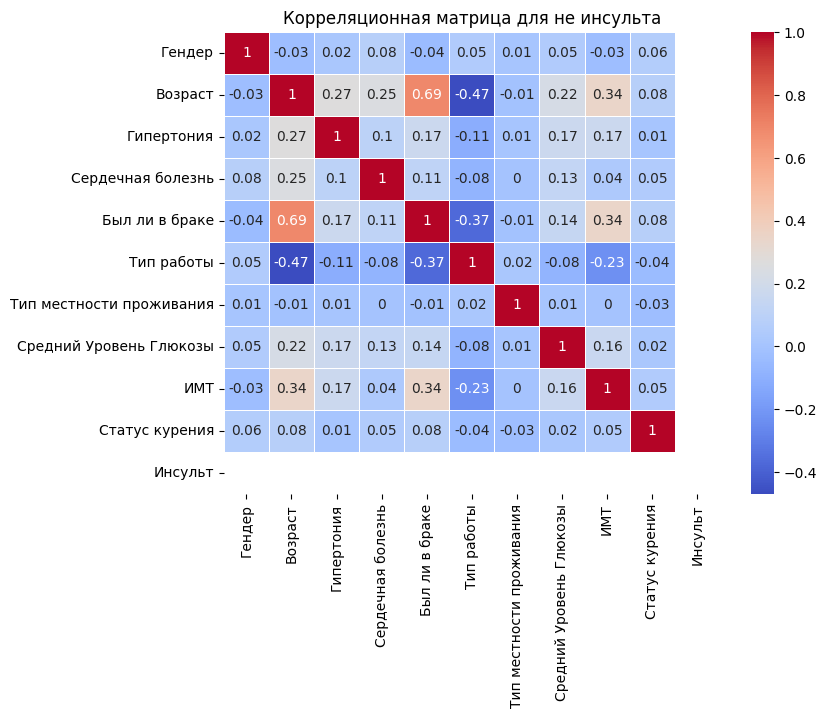

In [ ]:
stroke_happend = data[data['Инсульт'] == 1]  
stroke_not_happend = data[data['Инсульт'] == 0]  

stroke_happend_corr = stroke_happend.corr().round(2)
stroke_not_happend_corr = stroke_not_happend.corr().round(2)

plt.figure(figsize=(8, 6))
sb.heatmap(stroke_happend_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для инсульта')
plt.show()

plt.figure(figsize=(8, 6))
sb.heatmap(stroke_not_happend_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для тех, у кого не было инсульта')
plt.show()

In [ ]:
cross_tab = pd.crosstab(data['Статус курения'], data['Инсульт'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# Вывод результатов
print(f"Значение χ²: {chi2}")
print(f"p-value: {p}")
print(f"Степени свободы: {dof}")
print("Ожидаемые значения:")
print(expected)



Значение χ²: 29.225727075498273
p-value: 2.0077041756108283e-06
Степени свободы: 3
Ожидаемые значения:
[[1799.78860834   92.21139166]
 [1468.749266     75.250734  ]
 [ 840.91603053   43.08396947]
 [ 750.54609513   38.45390487]]
